In [67]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('satData.csv')

In [68]:
df.drop(columns="Unnamed: 0", axis = 0, inplace=True)

<AxesSubplot:xlabel='GPA', ylabel='SAT'>

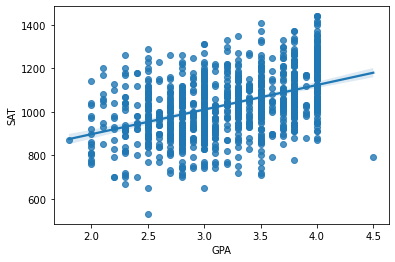

In [69]:
sns.regplot(x = 'GPA', y = 'SAT', data = df)

In [70]:
#df_1 = df.iloc[:700,:]
#df_2 = df.iloc[700:,:]

In [72]:
#sat = []
#for i in range(700):
#    sat.append(df["SAT"][i])
#gpa = []
#for i in range(700):
#    gpa.append(df["GPA"][i])
#df700=pd.DataFrame(columns=[gpa,sat])

#sat2 = []
#for i in range(700,1000):
#    sat2.append(df["SAT"][i])
#gpa2 = []
#for i in range(700,1000):
#    gpa2.append(df["GPA"][i])
#df300=pd.DataFrame(columns=[gpa,sat])

In [73]:
def testTrainSplit(data):
    length = len(df.index)
    split = int(length*0.7)
    train = data[0:split]
    test = data[split+1:length]
    return train, test

In [74]:
train, test = testTrainSplit(df)